In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inventorize as inv
%matplotlib inline

In [2]:
df = pd.read_csv('twentyeleven.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [3]:
df = df.drop_duplicates()
df = df.dropna(axis=0,how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367058 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      367058 non-null  float64
 1   StockCode    367058 non-null  object 
 2   Description  367058 non-null  object 
 3   Quantity     367058 non-null  int64  
 4   InvoiceDate  367058 non-null  object 
 5   Price        367058 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      367058 non-null  object 
 8   date         367058 non-null  object 
 9   revenue      367058 non-null  float64
 10  year         367058 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 33.6+ MB


In [4]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['week'] = df['InvoiceDate'].dt.week
df['dayofweek'] = df['InvoiceDate'].dt.dayofweek
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
df['month_year'] = df['InvoiceDate'].dt.strftime('%B-%Y')
df.tail()

<ipython-input-4-953f87d05d11>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['InvoiceDate'].dt.week


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year,week,dayofweek,month,month_year
484325,581587.0,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00+00:00,2.10,12680.0,France,2011-12-09,12.60,2011,49,4,12,December-2011
484326,581587.0,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,2011-12-09,16.60,2011,49,4,12,December-2011
484327,581587.0,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00+00:00,4.15,12680.0,France,2011-12-09,16.60,2011,49,4,12,December-2011
484328,581587.0,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00+00:00,4.95,12680.0,France,2011-12-09,14.85,2011,49,4,12,December-2011
484329,581587.0,POST,POSTAGE,1,2011-12-09 12:50:00+00:00,18.00,12680.0,France,2011-12-09,18.00,2011,49,4,12,December-2011


In [11]:
## Getting the last purchase date per Customer
df['date'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d')
df['date'] = pd.to_datetime(df['date'])
max_date = df['date'].max()
customer_last = df.groupby('Customer ID').agg(last_purchase_date=('date','max')).reset_index()
customer_last

,Customer ID,last_purchase_date
0,12347.0,2011-12-07
1,12348.0,2011-09-25
2,12349.0,2011-11-21
3,12350.0,2011-02-02
4,12352.0,2011-11-03
...,...,...
4214,18280.0,2011-03-07
4215,18281.0,2011-06-12
4216,18282.0,2011-12-02
4217,18283.0,2011-12-06


In [12]:
customer_last['recency'] = max_date - customer_last['last_purchase_date']
customer_last.head()

,Customer ID,last_purchase_date,recency
0,12347.0,2011-12-07,2 days
1,12348.0,2011-09-25,75 days
2,12349.0,2011-11-21,18 days
3,12350.0,2011-02-02,310 days
4,12352.0,2011-11-03,36 days


In [18]:
## changing recency to integers
customer_last['recency'] = customer_last['recency'].astype('string').str.replace('days','')
customer_last['recency'] = pd.to_numeric(customer_last['recency'],errors='coerce')
customer_last.head()

,Customer ID,last_purchase_date,recency
0,12347.0,2011-12-07,2
1,12348.0,2011-09-25,75
2,12349.0,2011-11-21,18
3,12350.0,2011-02-02,310
4,12352.0,2011-11-03,36


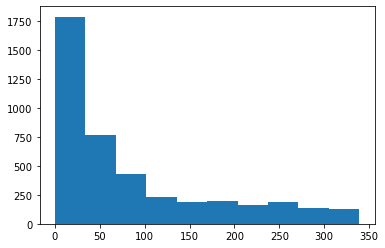

In [20]:
plt.hist(customer_last['recency']);

In [21]:
daily_sales = df.groupby('date').agg(total_daily_sales=('Quantity','sum'))
daily_sales.head()

,total_daily_sales
date,
2011-01-04,6950
2011-01-05,18369
2011-01-06,21582
2011-01-07,15122
2011-01-09,8125


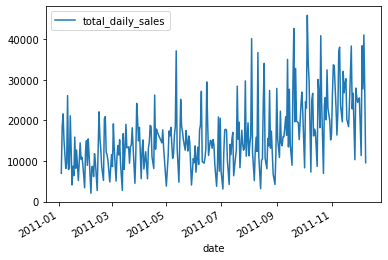

In [23]:
daily_sales.plot();

In [25]:
## Moving average sales
daily_sales['moving_7'] = daily_sales.rolling(window=7).mean()
daily_sales['moving_14'] = daily_sales.total_daily_sales.rolling(window=14).mean()
daily_sales

,total_daily_sales,moving_7,moving_14
date,,,
2011-01-04,6950,NaN,NaN
2011-01-05,18369,NaN,NaN
2011-01-06,21582,NaN,NaN
2011-01-07,15122,NaN,NaN
2011-01-09,8125,NaN,NaN
...,...,...,...
2011-12-05,38347,25463.285714,25062.785714
2011-12-06,27736,25435.285714,25725.571429
2011-12-07,41011,27596.000000,26905.285714


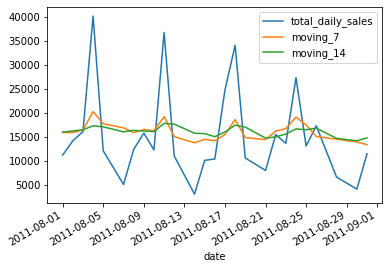

In [27]:
daily_sales['Aug-2011'].plot();

<AxesSubplot:xlabel='date'>

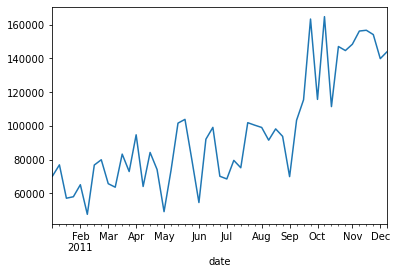

In [30]:
week_resamples = daily_sales.total_daily_sales.resample('w').sum()
week_resamples.plot()

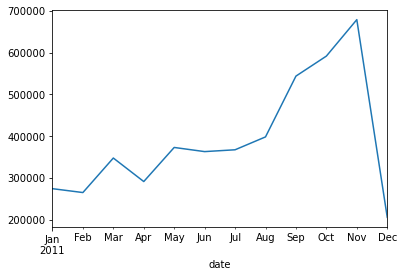

In [34]:
month_resamples = daily_sales.total_daily_sales.resample('m').sum()
month_resamples.plot();

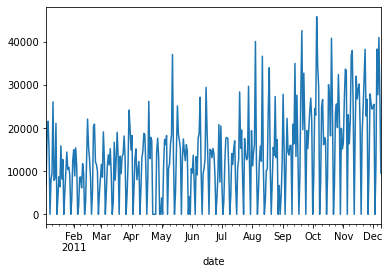

In [32]:
daily_resamples = daily_sales.total_daily_sales.resample('d').sum()
daily_resamples.plot();